In [ ]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
matplotlib.rcParams['axes.unicode_minus'] = False

!pip install catboost
!pip install pycaret
from tqdm.notebook import tqdm
from pycaret.regression import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ===DATA===

train = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/test.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/gh/kaggle/dacon/bicycle/dataset/sample_submission.csv')
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [ ]:
# ===UTILS===

# 1. seperate datetime
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point)-2017)
        month.append(int(month_point)-3)
        day.append(int(day_point))
    return year, month, day


# 2. Calculate NMAE
def NMAE(true, pred):
    return np.mean(np.abs(true-pred) / true)



In [ ]:
year, month, day = seperate_datetime(train)

train['year'] = year
train['month'] = month
train['day'] = day

year, month, day = seperate_datetime(test) #날짜 숫자로 분리 후 

test['year'] = year 
test['month'] = month
test['day'] = day

test_data = test.copy()

In [ ]:
reg = setup(data=train,
            target='number_of_rentals',
            session_id = 201,
            numeric_imputation = 'mean',
            fold_shuffle = True,
            numeric_features=list(train.drop(columns = ['date_time','wind_direction','Precipitation_Probability','number_of_rentals']).columns),
            ignore_low_variance = True,
            combine_rare_levels = True, rare_level_threshold = 0.05,
            remove_multicollinearity = True, multicollinearity_threshold = 0.90,
            normalize = True,
            silent= True)

add_metric(NMAE)

NameError: ignored

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)
best_5_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,5996.8822,6.985801e+07,8120.5914,0.9086,0.2844,0.2015,0.062
et,Extra Trees Regressor,6096.4921,8.024590e+07,8499.2493,0.8941,0.2825,0.2301,0.406
catboost,CatBoost Regressor,6189.6343,7.077177e+07,8188.5698,0.9071,0.2908,0.2423,1.491
rf,Random Forest Regressor,6282.7921,7.328789e+07,8380.3385,0.9037,0.2956,0.2384,0.451
lightgbm,Light Gradient Boosting Machine,6725.7992,8.569262e+07,9071.6345,0.8886,0.3225,0.2475,0.027
ada,AdaBoost Regressor,7716.2875,1.050624e+08,10098.0704,0.8630,0.3286,0.2868,0.084
par,Passive Aggressive Regressor,7880.2685,1.265605e+08,10856.5054,0.8295,0.4305,0.2710,0.029
huber,Huber Regressor,8315.2652,1.369580e+08,11271.7858,0.8152,0.4333,0.2884,0.024
br,Bayesian Ridge,8476.4628,1.323638e+08,11159.4752,0.8230,0.4039,0.2729,0.014
ridge,Ridge Regression,8555.5972,1.343619e+08,11227.1972,0.8200,0.3894,0.2761,0.013


[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=201, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, mi

In [ ]:
blended_l = blend_models(estimator_list = best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_data) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6983.3697,7.675623e+07,8761.0634,0.9085,0.3107,0.2314
1,7348.7362,9.502150e+07,9747.8970,0.8926,0.4568,0.4171
2,4482.0552,3.989560e+07,6316.2962,0.9425,0.2342,0.1385
3,5247.1595,5.948245e+07,7712.4866,0.9153,0.2818,0.1696
4,6580.2554,7.734890e+07,8794.8221,0.9078,0.2511,0.1961
Mean,6128.3152,6.970093e+07,8266.5131,0.9133,0.3069,0.2305
SD,1087.3273,1.866641e+07,1168.6300,0.0164,0.0794,0.0982


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,8316.9492,1.445651e+08,12023.5222,0.7809,0.3445,0.2766


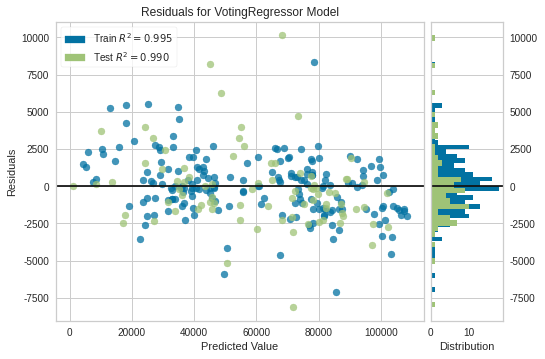

In [ ]:
plot_model(final_model_l, plot='residuals')

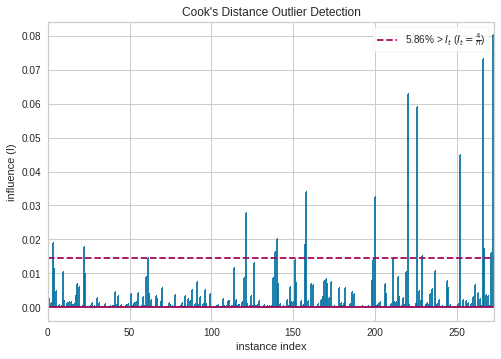

In [ ]:
plot_model(final_model_l, plot='cooks')

In [ ]:
rf_model = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7100.3030,7.727654e+07,8790.7074,0.8868,0.2903,0.2094
1,7585.6074,1.016197e+08,10080.6599,0.8988,0.3918,0.3212
2,8927.4216,1.276801e+08,11299.5637,0.8632,0.6077,0.6984
3,5787.1584,4.595131e+07,6778.7394,0.9320,0.1323,0.1053
4,4906.0205,3.558868e+07,5965.6250,0.9592,0.3377,0.2346
5,5522.9016,6.719419e+07,8197.2062,0.8679,0.1145,0.0819
6,5675.1616,6.330970e+07,7956.7391,0.9090,0.2645,0.1734
7,4765.2021,3.316814e+07,5759.1788,0.9471,0.2460,0.1588
8,6466.2526,1.043969e+08,10217.4818,0.8515,0.2669,0.1968
9,6091.8926,7.669352e+07,8757.4837,0.9211,0.3042,0.2039


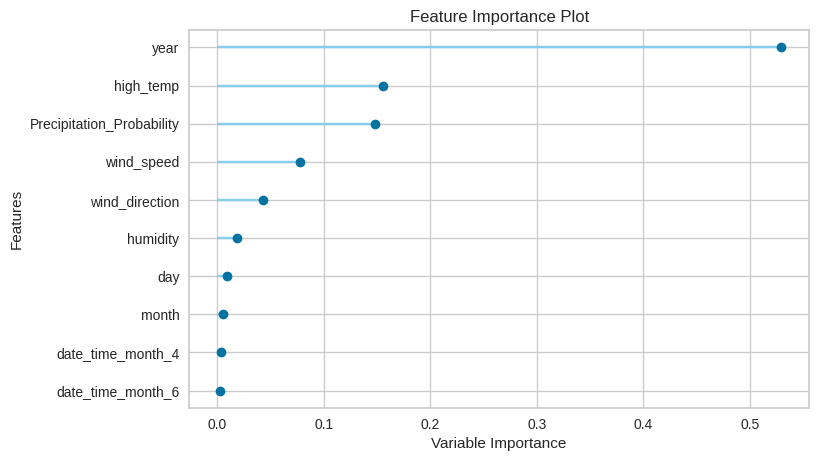

In [ ]:
plot_model(rf_model, plot='feature')

In [ ]:
def humidex(tmp, hum):
  result = 0.81*tmp + 0.01*hum * (0.99* tmp - 14.3) + 46.3
  return result



In [ ]:
dataframe['humidex'] = dataframe.apply(lambda x : humidex(x['high_temp'], x['humidity']), axis=1)

In [ ]:
def holiday_cat(week_day):
  if week_day in ['Saturday', 'Sunday'] :
    return 1
  else :
    return 0

dataframe['holiday'] = dataframe.apply(lambda x : holiday_cat(x['week_day']), axis = 1)
